In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn import model_selection # for train test split
from sklearn import preprocessing # for scaling

In [44]:
df=pd.read_csv("shopintention.csv")

In [45]:
df.head(10) #peek at the dataset

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [46]:
#renaming the columns
names=["admin","admin_dur","info","info_dur","prodrel","prodrel_dur","brate","erate","pagev","sday","month","os","browser","region","ttype","vtype","weekend","revenue"]

In [47]:
df.columns=names
index=df.columns[df.isna().any(axis=0)]
dict={}
for i in index:
    temp=df[i].isna().astype(int).sum()
    dict[i]=[temp/df.shape[0],temp]

In [48]:
dict

{'admin': [0.0011354420113544202, 14],
 'admin_dur': [0.0011354420113544202, 14],
 'info': [0.0011354420113544202, 14],
 'info_dur': [0.0011354420113544202, 14],
 'prodrel': [0.0011354420113544202, 14],
 'prodrel_dur': [0.0011354420113544202, 14],
 'brate': [0.0011354420113544202, 14],
 'erate': [0.0011354420113544202, 14]}

In [49]:
df.loc[df.isna().any(axis=1)]# checking the total number of rows affected by missing values

,admin,admin_dur,info,info_dur,prodrel,prodrel_dur,brate,erate,pagev,sday,month,os,browser,region,ttype,vtype,weekend,revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Mar,1,1,2,3,Returning_Visitor,False,False


In [50]:
cont=[]
for i in list(df.columns):
    print(i)
    print(len(df[i].unique()),"#######",df[i].unique())
    if len(df[i].unique())>20:
       cont.append(i)    ### making a list of continous variables
    print("===============================================================")
cont.append('sday')

admin
28 ####### [ 0.  1.  2.  4. 12.  3. 10.  6.  5.  9.  8. 16. 13. 11.  7. 18. 14. 17.
 19. 15. nan 24. 22. 21. 20. 23. 27. 26.]
admin_dur
3337 ####### [  0.         -1.         53.        ... 167.9107143 305.125
 150.3571429]
info
18 ####### [ 0.  1.  2.  4. 16.  5.  3. 14.  6. 12.  7. nan  9. 10.  8. 11. 24. 13.]
info_dur
1260 ####### [  0.    -1.   120.   ... 547.75 368.25 211.25]
prodrel
312 ####### [  1.   2.  10.  19.   3.  16.   7.   6.  23.  13.  20.   8.   5.  32.
   4.  45.  14.  52.   9.  46.  15.  22.  11.  12.  36.  42.  27.  90.
  18.  38.  17. 128.  25.  30.  21.  51.  26.  28.  31.  24.  50.  96.
  49.  68.  98.  67.  55.  35.  37.  29.  34.  71.  63.  87.  40.  33.
  54.  64.  75.  39. 111.  81.  61.  47.  44.  88. 149.  41.   0.  79.
  66.  43. 258.  80.  62.  83. 173.  48.  58.  57.  56.  69.  82.  59.
 109. 287.  53.  84.  78. 137. 113.  89.  65.  60.  nan 104. 129.  77.
  74.  93.  76.  72. 194. 140. 110. 132. 115.  73. 328. 160.  86. 150.
  95. 130. 151. 117. 1

In [51]:
df["revenue"]=df["revenue"].replace({False:0,True:1})#replacing True/False with 1/0 in the target variable
df["revenue"].value_counts()/df.shape[0]

0    0.845255
1    0.154745
Name: revenue, dtype: float64

In [52]:
cont.append('info')
cat=[]
for i in list(df.columns):
    if i not in cont:
        cat.append(i)#amking a list of categorical random variables
cat=cat[:-1]

In [53]:
print(cat)

['month', 'os', 'browser', 'region', 'ttype', 'vtype', 'weekend']


In [54]:
print(cont)

['admin', 'admin_dur', 'info_dur', 'prodrel', 'prodrel_dur', 'brate', 'erate', 'pagev', 'sday', 'info']


In [55]:
### Dropping the missing values 
df1=df
df1=df1.dropna()

<AxesSubplot:ylabel='admin'>

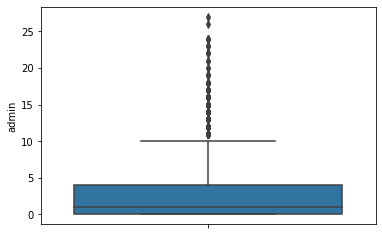

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(y=cont[0],data=df1)

<AxesSubplot:ylabel='admin_dur'>

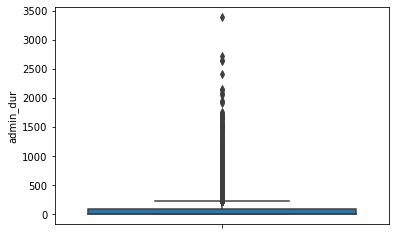

In [57]:
sns.boxplot(y=cont[1],data=df1)

<AxesSubplot:ylabel='info_dur'>

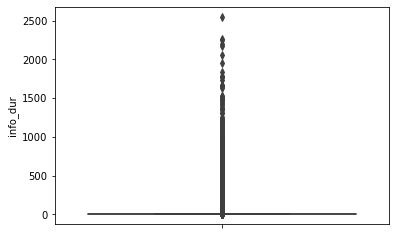

In [58]:
sns.boxplot(y=cont[2],data=df1)

<AxesSubplot:ylabel='prodrel'>

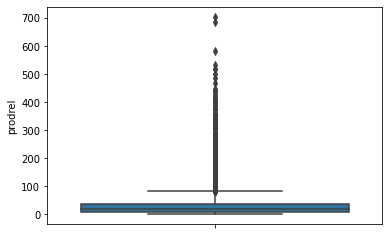

In [59]:
sns.boxplot(y=cont[3],data=df1)

<AxesSubplot:ylabel='prodrel_dur'>

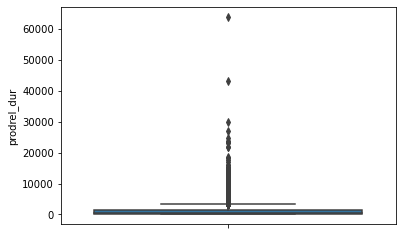

In [60]:
sns.boxplot(y=cont[4],data=df1)

<AxesSubplot:ylabel='brate'>

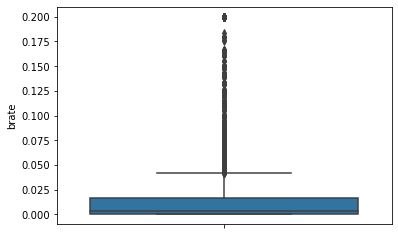

In [61]:
sns.boxplot(y=cont[5],data=df1)

<AxesSubplot:ylabel='erate'>

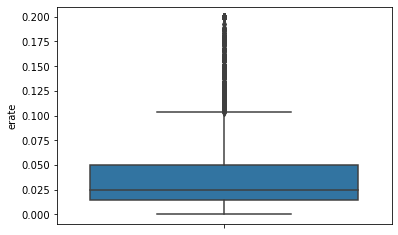

In [62]:
sns.boxplot(y=cont[6],data=df1)

<AxesSubplot:ylabel='pagev'>

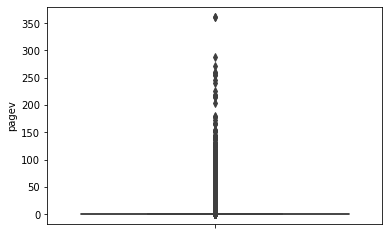

In [63]:
sns.boxplot(y=cont[7],data=df1)

In [64]:
df1.shape#shape of the daaset after dropping missing values

(12316, 18)

In [65]:
'''X_train=df1.iloc[:,:-1]
#X_train=pd.get_dummies(X_train,columns=cat,drop_first=True)

y_train=df1['revenue']


X_train.loc[X_train.isna().any(axis=1)]

from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy=0.7,random_state=10)
X_train, y_train = smote.fit_resample(X_train, y_train)

X_train.loc[X_train.isna().any(axis=1)]

X_train.shape

y_train.shape

type(y_train)

X_train.loc[y_train==0].shape[0]/X_train.shape[0]

X_train.loc[y_train==1].shape[0]

from imblearn.combine import SMOTETomek
smk = SMOTETomek()
X_res,y_res=smk.fit_resample(X_train,y_train)

X_train.loc[y_train==0].shape[0]

X_train.loc[y_train==1].shape[0]

from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(X_train, y_train)


X_tl.loc[y_tl==0].shape[0]/X_tl.shape[0]

X_tl.loc[y_tl==1].shape[0]/X_tl.shape[0]'''

"X_train=df1.iloc[:,:-1]\n#X_train=pd.get_dummies(X_train,columns=cat,drop_first=True)\n\ny_train=df1['revenue']\n\n\nX_train.loc[X_train.isna().any(axis=1)]\n\nfrom imblearn.over_sampling import SMOTE\nsmote=SMOTE(sampling_strategy=0.7,random_state=10)\nX_train, y_train = smote.fit_resample(X_train, y_train)\n\nX_train.loc[X_train.isna().any(axis=1)]\n\nX_train.shape\n\ny_train.shape\n\ntype(y_train)\n\nX_train.loc[y_train==0].shape[0]/X_train.shape[0]\n\nX_train.loc[y_train==1].shape[0]\n\nfrom imblearn.combine import SMOTETomek\nsmk = SMOTETomek()\nX_res,y_res=smk.fit_resample(X_train,y_train)\n\nX_train.loc[y_train==0].shape[0]\n\nX_train.loc[y_train==1].shape[0]\n\nfrom imblearn.under_sampling import TomekLinks\n\ntl = TomekLinks()\nX_tl, y_tl = tl.fit_resample(X_train, y_train)\n\n\nX_tl.loc[y_tl==0].shape[0]/X_tl.shape[0]\n\nX_tl.loc[y_tl==1].shape[0]/X_tl.shape[0]"

In [66]:
X=df1.iloc[:,:-1]
X=pd.get_dummies(X,columns=cat,drop_first=True)#one hot encoding of categorical random variables
Y=df1['revenue']
#Splitting the dataset into train and test
Xtrain,Xtest,Ytrain,Ytest=model_selection.train_test_split(X,Y,test_size=.2,random_state=20)

In [67]:
Xtrain.shape

(9852, 68)

In [26]:
X

,admin,admin_dur,info,info_dur,prodrel,prodrel_dur,brate,erate,pagev,sday,...,ttype_14,ttype_15,ttype_16,ttype_17,ttype_18,ttype_19,ttype_20,vtype_Other,vtype_Returning_Visitor,weekend_True
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,...,0,0,0,0,0,0,0,0,1,1
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,1
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
#SCALING THE TEST AND TRAIN DATA
scaler=preprocessing.StandardScaler()
scaler.fit(Xtrain[cont]) # fit is called only on training data 
Xtrain[cont]=scaler.transform(Xtrain[cont])
Xtest[cont]=scaler.transform(Xtest[cont])

In [28]:
print(Xtrain.shape[0],Ytrain.shape[0],"====",Xtest.shape[0],Ytest.shape[0])


9852 9852 ==== 2464 2464


In [68]:
for i in list(Xtrain.columns):
    print(i)
    print(len(Xtrain[i].unique()),"#######",Xtrain[i].unique())
      
    print("===============================================================")

admin
27 ####### [ 0.  2.  9.  4.  6.  8. 13.  1.  3.  5. 12. 10.  7. 24. 11. 17. 14. 27.
 16. 15. 20. 19. 18. 22. 21. 26. 23.]
admin_dur
2786 ####### [  0.           4.         904.5833333  ...  97.83333333  38.33333333
 218.9666667 ]
info
14 ####### [ 0.  4.  2.  1.  6.  3.  5.  9.  8.  7. 12. 10. 14. 24.]
info_dur
1064 ####### [   0.           83.5          43.33333333 ...   17.25         14.75
 1150.        ]
prodrel
281 ####### [ 36.  10. 132.  12.   7.  34.  52.  48.  68.  11.  15.  42.  56.  20.
  46.  43.   4.   2.  37. 107.  23.  51.   1.  95.  14.   3.  50.  21.
   8.  19.  28.  67.  25.  79.  93.   5.  18.   6.   9.  22.  40. 130.
  31. 143.  61.  32. 271.  30. 176.  71.  96.  17.  80.  16.  78.  27.
 155.  90.  97. 178. 103.  38. 440.  64.  45.  33.  13.  24.  57.  29.
  49.  39. 122.  69.  35.  72.  60.  84. 106.  44.  81.  74. 141. 159.
 222.   0. 162. 584.  82. 189.  41. 213. 309.  94. 173.  58.  47. 102.
 337.  53.  26. 149. 328. 125. 179. 171.  66. 221.  65. 517. 133. 

In [69]:
#RESAMPLING TO 70:30 FROM 85:15
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
count_class_0 = int(Xtrain.loc[Ytrain==0].shape[0]/1)
count_class_1 = int((count_class_0)*(30/70))
pipe = make_pipeline(SMOTE(sampling_strategy={1: count_class_1}),NearMiss(sampling_strategy={0: count_class_0}))
X_smt,y_smt = pipe.fit_resample(Xtrain,Ytrain)

In [70]:
X_smt.loc[y_smt==0].shape[0]/X_smt.shape[0]

0.7

In [71]:
X_smt.loc[y_smt==1].shape[0]/X_smt.shape[0]

0.3

In [72]:
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics

In [73]:
model=naive_bayes.GaussianNB()

In [74]:
df.columns

Index(['admin', 'admin_dur', 'info', 'info_dur', 'prodrel', 'prodrel_dur',
       'brate', 'erate', 'pagev', 'sday', 'month', 'os', 'browser', 'region',
       'ttype', 'vtype', 'weekend', 'revenue'],
      dtype='object')

In [75]:
model=naive_bayes.GaussianNB()

In [76]:
model.fit(X_smt,y_smt)

GaussianNB()

In [77]:
trainpred=model.predict(X_smt)
testpred=model.predict(Xtest)


In [78]:
def printresults(actual,predicted):
    print("AUC : ",np.round( metrics.roc_auc_score(actual,predicted),4)  )
    print("accuracy : ",np.round( metrics.accuracy_score(actual,predicted),4)  )
    print("recall: ",np.round( metrics.recall_score(actual,predicted),4)  )
    print("precision : ",np.round( metrics.precision_score(actual,predicted),4)  )
    print("f1 : ",np.round( metrics.f1_score(actual,predicted),4)  )

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [80]:
model.score(X_smt,y_smt)

0.7146588037068239

In [81]:
printresults(y_smt,trainpred)

AUC :  0.7563
accuracy :  0.7147
recall:  0.8604
precision :  0.5146
f1 :  0.644


In [82]:
printresults(Ytest,testpred)

AUC :  0.6531
accuracy :  0.6538
recall:  0.6521
precision :  0.2469
f1 :  0.3582



Test confusion_matrix


Text(33.0, 0.5, 'True')

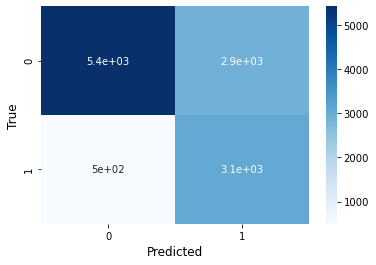

In [83]:
cf_matrix = metrics.confusion_matrix(y_smt,trainpred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)


Test confusion_matrix


Text(33.0, 0.5, 'True')

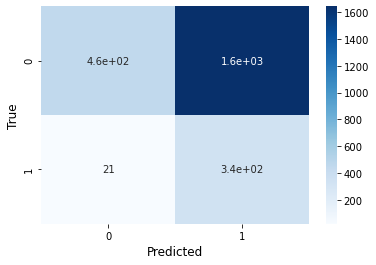

In [42]:
cf_matrix = metrics.confusion_matrix(Ytest,testpred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)